In [1]:
import pandas as pd

In [2]:
cf_data = pd.read_csv("https://raw.githubusercontent.com/ResearchProjectsUG/gpt-impact-codeforces/main/data/codeforces-round-943-div-3/filtered_submissions_by_relative_time.csv")

In [9]:
cf_data

,submission_id,contest_id,creation_time_seconds,relative_time_seconds,problem_index,author_handle,participation_type,programming_language,verdict,test_set,passed_test_count,time_consumed_milliseconds,memory_consumed_bytes
0,259134226,1968,1714661216,116,A,--ALPHA--,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,6,46,0
1,259145894,1968,1714661614,514,B,--ALPHA--,CONTESTANT,C++17 (GCC 7-32),WRONG_ANSWER,TESTS,1,61,0
2,259152791,1968,1714661871,771,B,--ALPHA--,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,12,77,0
3,259184107,1968,1714663514,2414,C,--ALPHA--,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,15,124,0
4,259207788,1968,1714665328,4228,D,--ALPHA--,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,14,202,15667200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94684,259169789,1968,1714662663,1563,C,zzzpLu,CONTESTANT,PyPy 3-64,OK,TESTS,15,186,9932800
94685,259191025,1968,1714663994,2894,D,zzzpLu,CONTESTANT,PyPy 3-64,OK,TESTS,14,280,33894400
94686,259204557,1968,1714665066,3966,E,zzzpLu,CONTESTANT,PyPy 3-64,OK,TESTS,13,140,8396800
94687,259239841,1968,1714668519,7419,G1,zzzpLu,CONTESTANT,PyPy 3-64,TIME_LIMIT_EXCEEDED,TESTS,10,2000,7577600


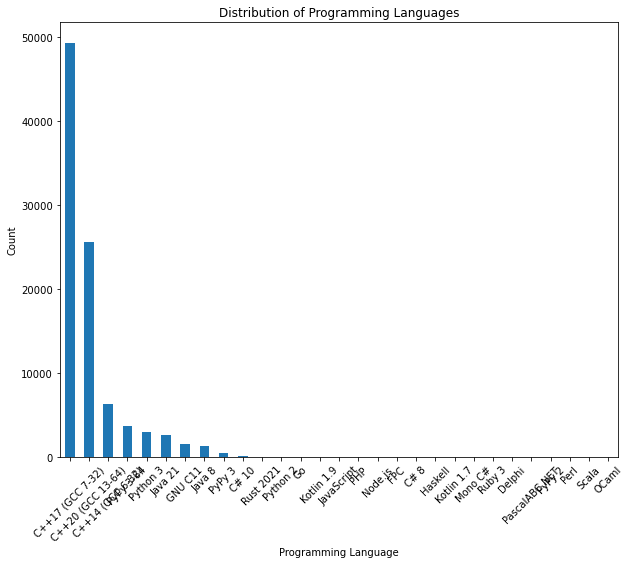

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cf_data is your DataFrame and 'programming_language' is the column of interest
language_counts = cf_data['programming_language'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
language_counts.plot(kind='bar')
plt.title('Distribution of Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

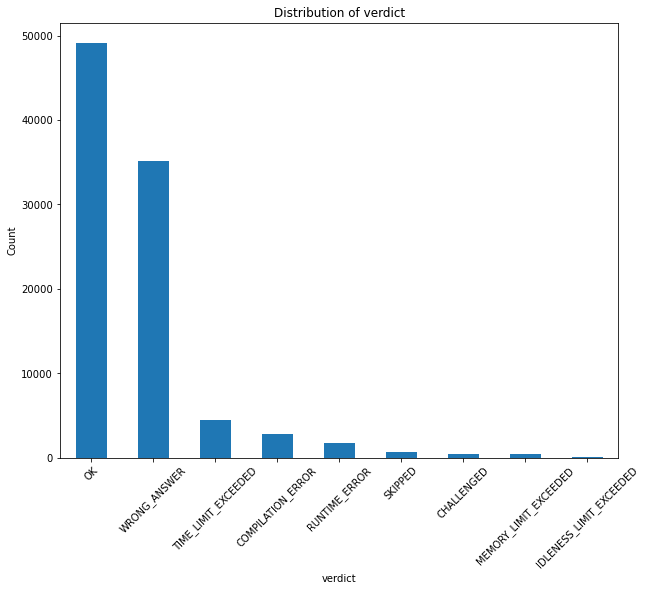

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cf_data is your DataFrame and 'programming_language' is the column of interest
language_counts = cf_data['verdict'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
language_counts.plot(kind='bar')
plt.title('Distribution of verdict')
plt.xlabel('verdict')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [51]:
correct_counts_by_user

TomGreen              8
Zhou_Yuan             8
PineaP                8
supepapupu            8
-depressedkid-        8
                     ..
CMRIT25_21R01A66B8    1
CMRIT25_21R01A7350    1
CMRIT25_21r01a6669    1
ibrahimabdelhalim     1
amirheadayatip        1
Name: author_handle, Length: 17432, dtype: int64

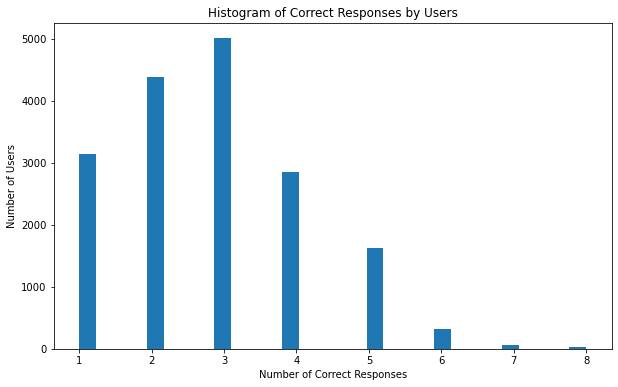

In [16]:
# Counting the number of correct responses ("OK" verdict) by user using "author_handle"

# Filter the DataFrame to include only rows where verdict is "OK"
correct_responses = cf_data[cf_data['verdict'] == 'OK']

# Count the number of correct responses grouped by "author_handle"
correct_counts_by_user = correct_responses['author_handle'].value_counts()

import matplotlib.pyplot as plt

# Plotting the histogram for the number of correct responses by user
plt.figure(figsize=(10, 6))
correct_counts_by_user.hist(bins=30)
plt.title('Histogram of Correct Responses by Users')
plt.xlabel('Number of Correct Responses')
plt.ylabel('Number of Users')
plt.grid(False)
plt.show()

In [19]:
correct_counts_by_user

TomGreen              8
Zhou_Yuan             8
PineaP                8
supepapupu            8
-depressedkid-        8
                     ..
CMRIT25_21R01A66B8    1
CMRIT25_21R01A7350    1
CMRIT25_21r01a6669    1
ibrahimabdelhalim     1
amirheadayatip        1
Name: author_handle, Length: 17432, dtype: int64

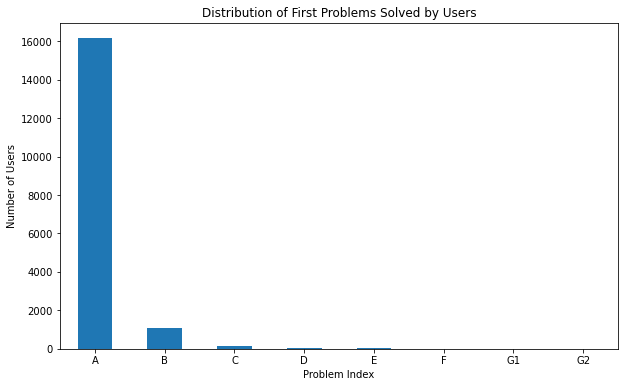

In [20]:
# Filter for submissions where the verdict was "OK"
ok_submissions = cf_data[cf_data['verdict'] == 'OK']

# Sorting the data by "author_handle" and "creation_time_seconds" to identify the first correct submission for each user
ok_submissions_sorted = ok_submissions.sort_values(by=['author_handle', 'creation_time_seconds'])

# Dropping duplicates to keep only the first correct submission per user
first_correct_per_user = ok_submissions_sorted.drop_duplicates(subset=['author_handle'], keep='first')

# Extracting the relevant information: user handle and the first problem they solved
first_problem_solved_by_user = first_correct_per_user[['author_handle', 'problem_index']]

# Plotting the distribution of the first problem solved by each user
plt.figure(figsize=(10, 6))
first_problem_solved_by_user['problem_index'].value_counts().plot(kind='bar')
plt.title('Distribution of First Problems Solved by Users')
plt.xlabel('Problem Index')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()


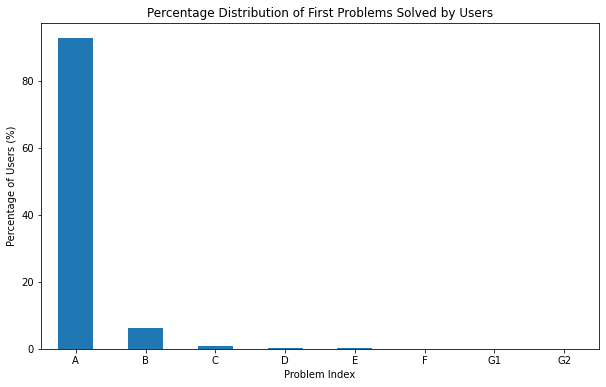

In [21]:
# Calculating the distribution of the first problem solved in percentages
problem_distribution_percentage = first_problem_solved_by_user['problem_index'].value_counts(normalize=True) * 100

# Plotting the distribution of the first problem solved by each user in percentages
plt.figure(figsize=(10, 6))
problem_distribution_percentage.plot(kind='bar')
plt.title('Percentage Distribution of First Problems Solved by Users')
plt.xlabel('Problem Index')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=0)
plt.show()

In [43]:
first_correct_per_user

,submission_id,contest_id,creation_time_seconds,relative_time_seconds,problem_index,author_handle,participation_type,programming_language,verdict,test_set,passed_test_count,time_consumed_milliseconds,memory_consumed_bytes,collapsed_language
0,259134226,1968,1714661216,116,A,--ALPHA--,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,6,46,0,C++
5,259153928,1968,1714661917,817,A,-.01,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,6,61,102400,C++
9,259175923,1968,1714663011,1911,A,-.foreverlcd.-,CONTESTANT,Python 3,OK,TESTS,6,437,0,Python
15,259138255,1968,1714661360,260,A,-0.31,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,6,187,0,C++
32,259146982,1968,1714661652,552,A,-01,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,6,187,0,C++
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94653,259139096,1968,1714661388,288,A,zzq_helloworld,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,6,108,0,C++
94660,259142921,1968,1714661514,414,A,zzuliLLL,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,6,78,0,C++
94664,259143752,1968,1714661539,439,A,zzulky,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,6,171,0,C++
94671,259172969,1968,1714662840,1740,A,zzyn0375,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,6,46,0,C++


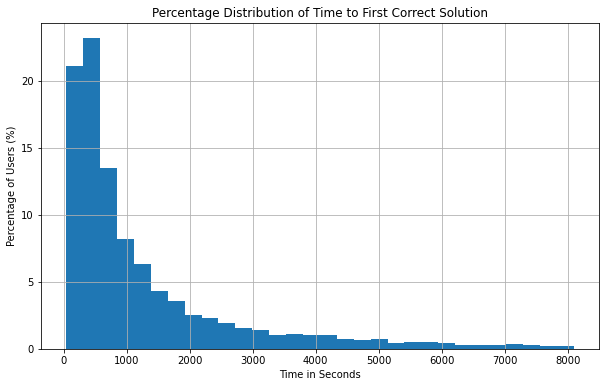

In [23]:
# Dropping duplicates to keep only the first correct submission per user
first_correct_per_user = ok_submissions_sorted.drop_duplicates(subset=['author_handle'], keep='first')

# Extracting the relevant information: user handle and the first problem they solved, including the time it took
first_problem_time_by_user = first_correct_per_user[['author_handle', 'relative_time_seconds']]

# Plotting the histogram for the time to first correct solution in percentages
plt.figure(figsize=(10, 6))
first_problem_time_by_user['relative_time_seconds'].hist(weights=np.ones(len(first_problem_time_by_user)) / len(first_problem_time_by_user) * 100, bins=30)
plt.title('Percentage Distribution of Time to First Correct Solution')
plt.xlabel('Time in Seconds')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=0)
plt.show()

In [24]:
first_problem_time_by_user.describe()

,relative_time_seconds
count,17432.000000
mean,1269.768414
std,1474.916754
min,40.000000
25%,345.000000
50%,671.000000
75%,1542.000000
max,8093.000000


In [26]:
# Calculating the 90th, 95th, and 99th percentiles of the time it took users to solve their first problem correctly
percentiles = np.percentile(first_problem_time_by_user['relative_time_seconds'], [90, 95, 99])

percentiles_dict = {
    "90th percentile": percentiles[0],
    "95th percentile": percentiles[1],
    "99th percentile": percentiles[2]
}

percentiles_dict

{'90th percentile': 3296.0,
 '95th percentile': 4681.9000000000015,
 '99th percentile': 7061.379999999997}

In [29]:
first_correct_per_user

,submission_id,contest_id,creation_time_seconds,relative_time_seconds,problem_index,author_handle,participation_type,programming_language,verdict,test_set,passed_test_count,time_consumed_milliseconds,memory_consumed_bytes,collapsed_language
0,259134226,1968,1714661216,116,A,--ALPHA--,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,6,46,0,C++
5,259153928,1968,1714661917,817,A,-.01,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,6,61,102400,C++
9,259175923,1968,1714663011,1911,A,-.foreverlcd.-,CONTESTANT,Python 3,OK,TESTS,6,437,0,Python
15,259138255,1968,1714661360,260,A,-0.31,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,6,187,0,C++
32,259146982,1968,1714661652,552,A,-01,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,6,187,0,C++
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94653,259139096,1968,1714661388,288,A,zzq_helloworld,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,6,108,0,C++
94660,259142921,1968,1714661514,414,A,zzuliLLL,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,6,78,0,C++
94664,259143752,1968,1714661539,439,A,zzulky,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,6,171,0,C++
94671,259172969,1968,1714662840,1740,A,zzyn0375,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,6,46,0,C++


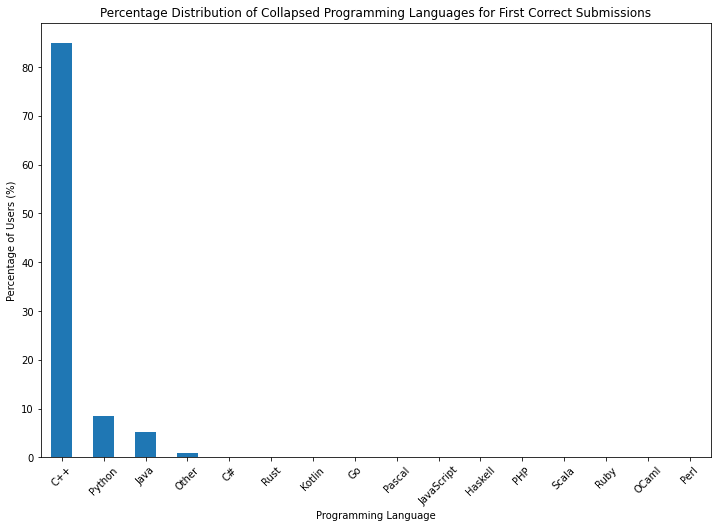

C++           84.849702
Python         8.495870
Java           5.214548
Other          1.003901
C#             0.103258
Rust           0.074575
Kotlin         0.063102
Go             0.057366
Pascal         0.034419
JavaScript     0.028683
Haskell        0.028683
PHP            0.017210
Scala          0.011473
Ruby           0.005737
OCaml          0.005737
Perl           0.005737
Name: collapsed_language, dtype: float64

In [30]:
# Defining the function to collapse programming languages into a base language
def collapse_language(lang):
    if 'C++' in lang:
        return 'C++'
    elif 'Python' in lang or 'PyPy' in lang:
        return 'Python'
    elif 'Java' in lang:
        return 'Java'
    elif 'C#' in lang:
        return 'C#'
    elif 'Kotlin' in lang:
        return 'Kotlin'
    elif 'Go' in lang:
        return 'Go'
    elif 'Rust' in lang:
        return 'Rust'
    elif 'JavaScript' in lang or 'Node.js' in lang:
        return 'JavaScript'
    elif 'Haskell' in lang:
        return 'Haskell'
    elif 'PHP' in lang:
        return 'PHP'
    elif 'Scala' in lang:
        return 'Scala'
    elif 'FPC' in lang or 'PascalABC.NET' in lang or 'Delphi' in lang:
        return 'Pascal'
    elif 'Ruby' in lang:
        return 'Ruby'
    elif 'OCaml' in lang:
        return 'OCaml'
    elif 'Perl' in lang:
        return 'Perl'
    else:
        return 'Other'

# Calculating the percentage distribution of the collapsed programming languages
collapsed_language_percentage = first_correct_per_user['collapsed_language'].value_counts(normalize=True) * 100

# Plotting the percentage distribution of the collapsed programming languages
plt.figure(figsize=(12, 8))
collapsed_language_percentage.plot(kind='bar')
plt.title('Percentage Distribution of Collapsed Programming Languages for First Correct Submissions')
plt.xlabel('Programming Language')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=45)
plt.show()

collapsed_language_percentage



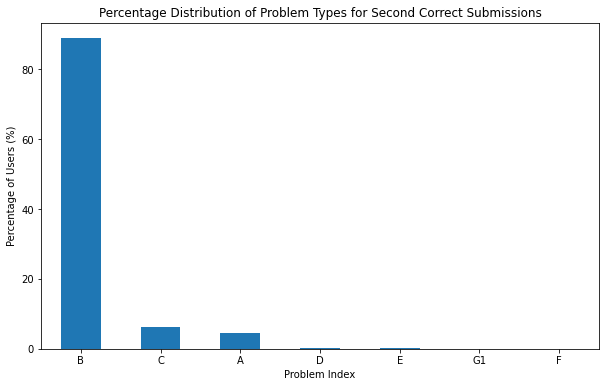

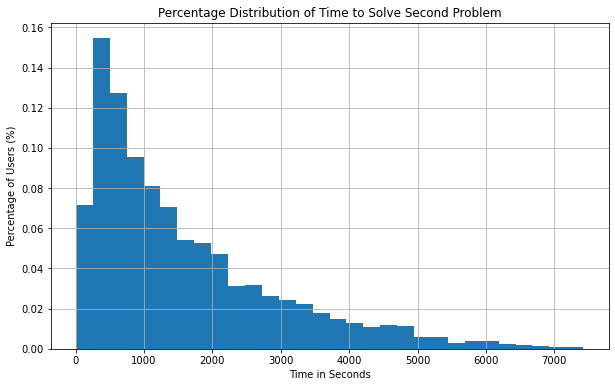

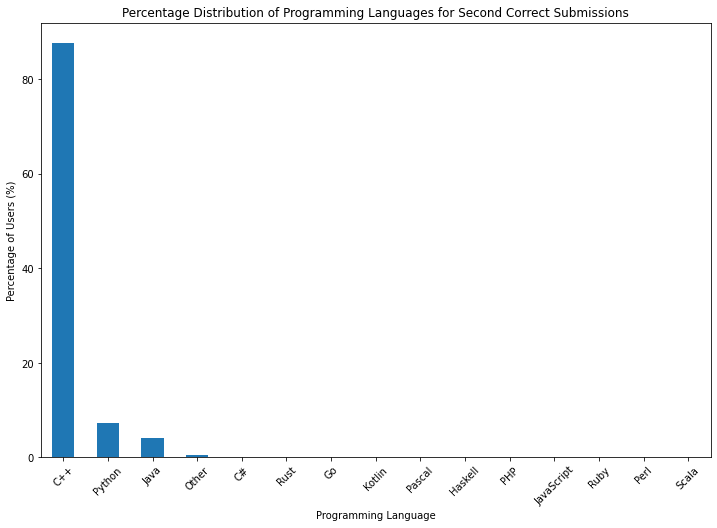

C++           87.587511
Python         7.315878
Java           4.109493
Other          0.525063
C#             0.119014
Rust           0.084010
Go             0.070008
Kotlin         0.063008
Pascal         0.035004
Haskell        0.028003
PHP            0.021003
JavaScript     0.021003
Ruby           0.007001
Perl           0.007001
Scala          0.007001
Name: collapsed_language, dtype: float64

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Load the data
# file_path = '/mnt/data/filtered_submissions_by_relative_time.csv'
# cf_data = pd.read_csv(file_path)

# Filtering and sorting submissions with a verdict of 'OK'
ok_submissions_sorted = cf_data[cf_data['verdict'] == 'OK'].sort_values(by=['author_handle', 'creation_time_seconds'])

# Grouping by 'author_handle' and capturing the second correct submission
second_submissions = ok_submissions_sorted.groupby('author_handle').nth(1).reset_index()

# Calculate the time differences
second_submissions['time_to_solve_second'] = ok_submissions_sorted.groupby('author_handle')['relative_time_seconds'].diff().dropna()

# Function to collapse programming languages into general categories
def collapse_language(lang):
    if 'C++' in lang:
        return 'C++'
    elif 'Python' in lang or 'PyPy' in lang:
        return 'Python'
    elif 'Java' in lang:
        return 'Java'
    elif 'C#' in lang:
        return 'C#'
    elif 'Kotlin' in lang:
        return 'Kotlin'
    elif 'Go' in lang:
        return 'Go'
    elif 'Rust' in lang:
        return 'Rust'
    elif 'JavaScript' in lang or 'Node.js' in lang:
        return 'JavaScript'
    elif 'Haskell' in lang:
        return 'Haskell'
    elif 'PHP' in lang:
        return 'PHP'
    elif 'Scala' in lang:
        return 'Scala'
    elif 'FPC' in lang or 'PascalABC.NET' in lang or 'Delphi' in lang:
        return 'Pascal'
    elif 'Ruby' in lang:
        return 'Ruby'
    elif 'OCaml' in lang:
        return 'OCaml'
    elif 'Perl' in lang:
        return 'Perl'
    else:
        return 'Other'

# Adding collapsed_language for demonstration purposes
second_submissions['collapsed_language'] = second_submissions['programming_language'].apply(collapse_language)

# Plotting distribution of Problem Types for the Second Correct Submission in percentages
plt.figure(figsize=(10, 6))
(second_submissions['problem_index'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Percentage Distribution of Problem Types for Second Correct Submissions')
plt.xlabel('Problem Index')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=0)
plt.show()

# Histogram of Time Taken to Solve the Second Problem in percentages
plt.figure(figsize=(10, 6))
weights = np.ones_like(second_submissions['time_to_solve_second'].dropna()) / len(second_submissions['time_to_solve_second'].dropna())
second_submissions['time_to_solve_second'].dropna().hist(weights=weights, bins=30)
plt.title('Percentage Distribution of Time to Solve Second Problem')
plt.xlabel('Time in Seconds')
plt.ylabel('Percentage of Users (%)')
plt.show()

# Distribution of Collapsed Programming Languages for the Second Correct Submissions in percentages
plt.figure(figsize=(12, 8))
(second_submissions['collapsed_language'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Percentage Distribution of Programming Languages for Second Correct Submissions')
plt.xlabel('Programming Language')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=45)
plt.show()
second_submissions['collapsed_language'].value_counts(normalize=True) * 100

In [45]:
# Counting the number of unique competitors who solved the second question
num_competitors_first_correct_per_user = first_correct_per_user['author_handle'].nunique()
print(num_competitors_first_correct_per_user)

# Counting the number of unique competitors who solved the second question
num_competitors_second_question = second_submissions['author_handle'].nunique()
num_competitors_second_question

17432


14284

In [55]:
third_submissions

,author_handle,submission_id,contest_id,creation_time_seconds,relative_time_seconds,problem_index,participation_type,programming_language,verdict,test_set,passed_test_count,time_consumed_milliseconds,memory_consumed_bytes,time_to_solve_third,collapsed_language
0,--ALPHA--,259184107,1968,1714663514,2414,C,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,15,124,0,NaN,C++
1,-.01,259217845,1968,1714666238,5138,C,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,15,249,102400,NaN,C++
2,-0.31,259156625,1968,1714662032,932,C,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,15,140,0,NaN,C++
3,-01,259188402,1968,1714663804,2704,C,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,15,249,2457600,2298.0,C++
4,-0eiqe,259170838,1968,1714662718,1618,C,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,15,233,102400,3457.0,C++
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,zzhi,259219019,1968,1714666353,5253,C,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,15,265,0,NaN,C++
9893,zzq_helloworld,259184903,1968,1714663565,2465,C,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,15,233,0,2294.0,C++
9894,zzuliLLL,259173269,1968,1714662859,1759,C,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,15,77,0,3012.0,C++
9895,zzulky,259194626,1968,1714664272,3172,B,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,12,46,0,NaN,C++


In [54]:
third_submissions.author_handle.nunique()

9897

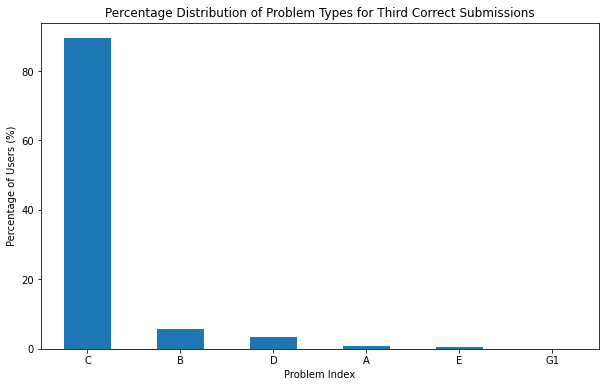

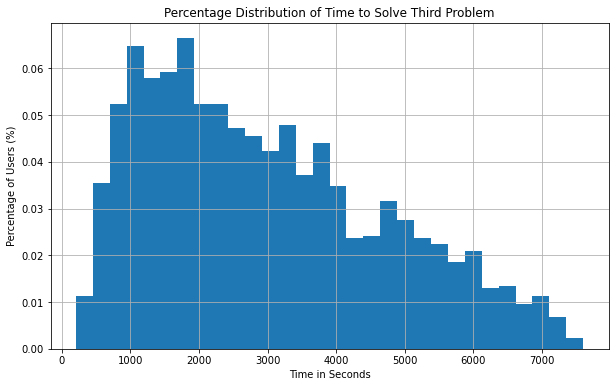

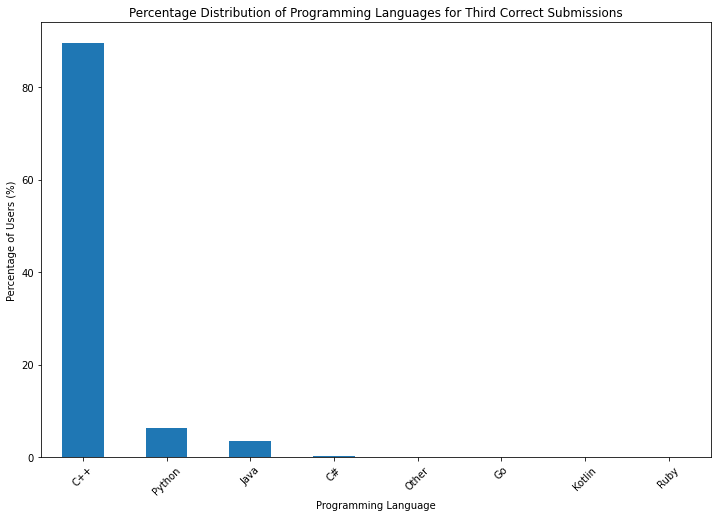

C++       89.470721
Python     6.250000
Java       3.603604
C#         0.225225
Other      0.168919
Go         0.168919
Kotlin     0.056306
Ruby       0.056306
Name: collapsed_language, dtype: float64

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Load the data from the uploaded file
# file_path = '/mnt/data/filtered_submissions_by_relative_time.csv'
# cf_data = pd.read_csv(file_path)

# Filtering and sorting submissions with a verdict of 'OK'
ok_submissions_sorted = cf_data[cf_data['verdict'] == 'OK'].sort_values(by=['author_handle', 'creation_time_seconds'])

# Capturing the third correct submission for each user
third_submissions = ok_submissions_sorted.groupby('author_handle').nth(2).reset_index()

# Calculate the time differences for each user from their second to their third correct solution
third_submissions['time_to_solve_third'] = ok_submissions_sorted.groupby('author_handle')['relative_time_seconds'].diff(periods=2).dropna()

# Apply the collapse_language function to collapse programming languages
def collapse_language(lang):
    if 'C++' in lang:
        return 'C++'
    elif 'Python' in lang or 'PyPy' in lang:
        return 'Python'
    elif 'Java' in lang:
        return 'Java'
    elif 'C#' in lang:
        return 'C#'
    elif 'Kotlin' in lang:
        return 'Kotlin'
    elif 'Go' in lang:
        return 'Go'
    elif 'Rust' in lang:
        return 'Rust'
    elif 'JavaScript' in lang or 'Node.js' in lang:
        return 'JavaScript'
    elif 'Haskell' in lang:
        return 'Haskell'
    elif 'PHP' in lang:
        return 'PHP'
    elif 'Scala' in lang:
        return 'Scala'
    elif 'FPC' in lang or 'PascalABC.NET' in lang or 'Delphi' in lang:
        return 'Pascal'
    elif 'Ruby' in lang:
        return 'Ruby'
    elif 'OCaml' in lang:
        return 'OCaml'
    elif 'Perl' in lang:
        return 'Perl'
    else:
        return 'Other'
third_submissions['collapsed_language'] = third_submissions['programming_language'].apply(collapse_language)

# Ensuring complete data for those who have a third submission time calculated
complete_third_submissions = third_submissions.dropna(subset=['time_to_solve_third'])

# Plotting distribution of Problem Types for the Third Correct Submission in percentages
plt.figure(figsize=(10, 6))
(complete_third_submissions['problem_index'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Percentage Distribution of Problem Types for Third Correct Submissions')
plt.xlabel('Problem Index')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=0)
plt.show()

# Histogram of Time Taken to Solve the Third Problem in percentages
plt.figure(figsize=(10, 6))
weights = np.ones_like(complete_third_submissions['time_to_solve_third']) / len(complete_third_submissions['time_to_solve_third'])
complete_third_submissions['time_to_solve_third'].hist(weights=weights, bins=30)
plt.title('Percentage Distribution of Time to Solve Third Problem')
plt.xlabel('Time in Seconds')
plt.ylabel('Percentage of Users (%)')
plt.show()

# Distribution of Collapsed Programming Languages for the Third Correct Submissions in percentages
plt.figure(figsize=(12, 8))
(complete_third_submissions['collapsed_language'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Percentage Distribution of Programming Languages for Third Correct Submissions')
plt.xlabel('Programming Language')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=45)
plt.show()
complete_third_submissions['collapsed_language'].value_counts(normalize=True) * 100

In [47]:
complete_third_submissions

,author_handle,submission_id,contest_id,creation_time_seconds,relative_time_seconds,problem_index,participation_type,programming_language,verdict,test_set,passed_test_count,time_consumed_milliseconds,memory_consumed_bytes,time_to_solve_third,collapsed_language
3,-01,259188402,1968,1714663804,2704,C,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,15,249,2457600,2298.0,C++
4,-0eiqe,259170838,1968,1714662718,1618,C,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,15,233,102400,3457.0,C++
8,-Anuj_Kumar-,259178591,1968,1714663170,2070,C,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,15,139,0,4321.0,C++
17,-Zzzz,259172096,1968,1714662791,1691,C,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,15,139,0,672.0,C++
18,-_-..zzZ,259189019,1968,1714663848,2748,C,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,15,233,0,1299.0,C++
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9875,zunaied4821,259228124,1968,1714667256,6156,C,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,15,93,0,4666.0,C++
9876,zuoshou.,259197153,1968,1714664461,3361,C,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,15,139,1638400,3128.0,C++
9893,zzq_helloworld,259184903,1968,1714663565,2465,C,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,15,233,0,2294.0,C++
9894,zzuliLLL,259173269,1968,1714662859,1759,C,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,15,77,0,3012.0,C++


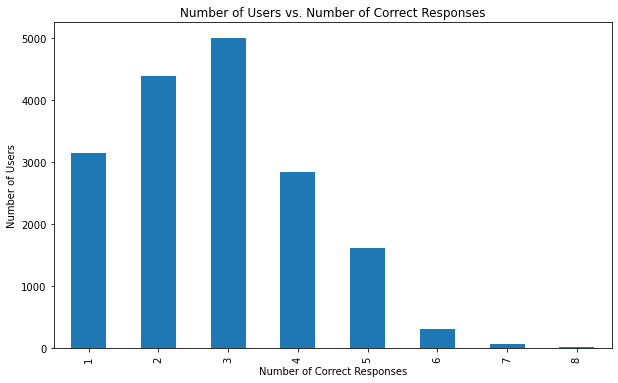

In [50]:
import matplotlib.pyplot as plt

# Counting the number of correct responses ("OK" verdict) by user using "author_handle"
correct_responses = cf_data[cf_data['verdict'] == 'OK']
correct_counts_by_user = correct_responses['author_handle'].value_counts()

# Plotting the histogram for the number of correct responses by user
plt.figure(figsize=(10, 6))
correct_counts_by_user.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Users vs. Number of Correct Responses')
plt.xlabel('Number of Correct Responses')
plt.ylabel('Number of Users')
plt.grid(False)
plt.show()


In [69]:
correct_submissions

,author_handle,submission_id,contest_id,creation_time_seconds,relative_time_seconds,problem_index,participation_type,programming_language,verdict,test_set,passed_test_count,time_consumed_milliseconds,memory_consumed_bytes,collapsed_language,time_to_solve_third
0,--ALPHA--,259152791,1968,1714661871,771,B,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,12,77,0,C++,1643.0
1,--ALPHA--,259184107,1968,1714663514,2414,C,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,15,124,0,C++,1643.0
2,-.01,259174418,1968,1714662928,1828,B,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,12,124,0,C++,3310.0
3,-.01,259217845,1968,1714666238,5138,C,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,15,249,102400,C++,3310.0
4,-.foreverlcd.-,259186700,1968,1714663687,2587,B,CONTESTANT,Python 3,OK,TESTS,12,109,2457600,Python,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24176,zzulky,259187806,1968,1714663763,2663,C,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,15,92,0,C++,509.0
24177,zzulky,259194626,1968,1714664272,3172,B,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,12,46,0,C++,509.0
24178,zzyn0375,259204636,1968,1714665072,3972,B,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,12,62,0,C++,NaN
24179,zzzpLu,259151660,1968,1714661825,725,B,CONTESTANT,PyPy 3-64,OK,TESTS,12,124,6758400,Python,838.0


In [71]:
second_and_third_submissions

,submission_id,contest_id,creation_time_seconds,relative_time_seconds,problem_index,participation_type,programming_language,verdict,test_set,passed_test_count,time_consumed_milliseconds,memory_consumed_bytes,time_to_solve_third
author_handle,,,,,,,,,,,,,
--ALPHA--,259152791,1968,1714661871,771,B,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,12,77,0,NaN
--ALPHA--,259184107,1968,1714663514,2414,C,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,15,124,0,1643.0
-.01,259174418,1968,1714662928,1828,B,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,12,124,0,NaN
-.01,259217845,1968,1714666238,5138,C,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,15,249,102400,3310.0
-.foreverlcd.-,259186700,1968,1714663687,2587,B,CONTESTANT,Python 3,OK,TESTS,12,109,2457600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzulky,259187806,1968,1714663763,2663,C,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,15,92,0,NaN
zzulky,259194626,1968,1714664272,3172,B,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,12,46,0,509.0
zzyn0375,259204636,1968,1714665072,3972,B,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,12,62,0,NaN


In [72]:
third_submissions

,author_handle,submission_id,contest_id,creation_time_seconds,relative_time_seconds,problem_index,participation_type,programming_language,verdict,test_set,passed_test_count,time_consumed_milliseconds,memory_consumed_bytes,time_to_solve_third,collapsed_language
0,--ALPHA--,259152791,1968,1714661871,771,B,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,12,77,0,NaN,C++
1,-.01,259174418,1968,1714662928,1828,B,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,12,124,0,NaN,C++
2,-0.31,259148047,1968,1714661690,590,B,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,12,62,0,NaN,C++
3,-01,259173370,1968,1714662863,1763,B,CONTESTANT,PyPy 3-64,OK,TESTS,12,265,6553600,NaN,Python
4,-0eiqe,259157105,1968,1714662052,952,B,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,12,77,409600,NaN,C++
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,zzhi,259209537,1968,1714665475,4375,B,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,12,77,0,NaN,C++
9893,zzq_helloworld,259157975,1968,1714662090,990,B,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,12,92,0,NaN,C++
9894,zzuliLLL,259153888,1968,1714661915,815,B,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,12,46,0,NaN,C++
9895,zzulky,259187806,1968,1714663763,2663,C,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,15,92,0,NaN,C++


In [77]:
third_submissions

,author_handle,submission_id,contest_id,creation_time_seconds,relative_time_seconds,problem_index,participation_type,programming_language,verdict,test_set,passed_test_count,time_consumed_milliseconds,memory_consumed_bytes,time_to_solve_third,collapsed_language
0,--ALPHA--,259184107,1968,1714663514,2414,C,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,15,124,0,1643.0,C++
1,-.01,259217845,1968,1714666238,5138,C,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,15,249,102400,3310.0,C++
2,-0.31,259156625,1968,1714662032,932,C,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,15,140,0,342.0,C++
3,-01,259188402,1968,1714663804,2704,C,CONTESTANT,C++17 (GCC 7-32),OK,TESTS,15,249,2457600,941.0,C++
4,-0eiqe,259170838,1968,1714662718,1618,C,CONTESTANT,C++14 (GCC 6-32),OK,TESTS,15,233,102400,666.0,C++
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,zzhi,259219019,1968,1714666353,5253,C,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,15,265,0,878.0,C++
9893,zzq_helloworld,259184903,1968,1714663565,2465,C,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,15,233,0,1475.0,C++
9894,zzuliLLL,259173269,1968,1714662859,1759,C,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,15,77,0,944.0,C++
9895,zzulky,259194626,1968,1714664272,3172,B,CONTESTANT,C++20 (GCC 13-64),OK,TESTS,12,46,0,509.0,C++


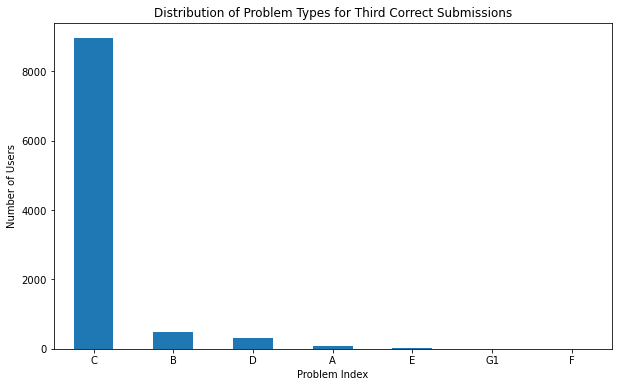

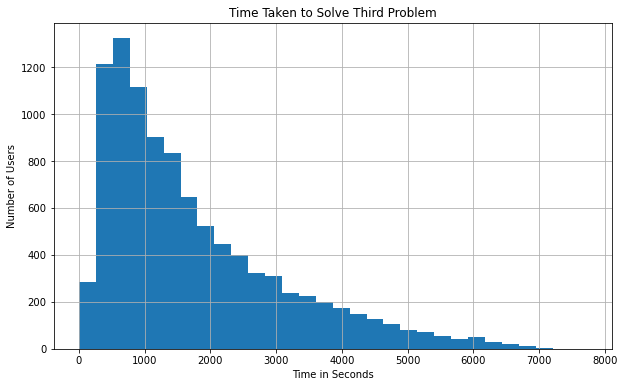

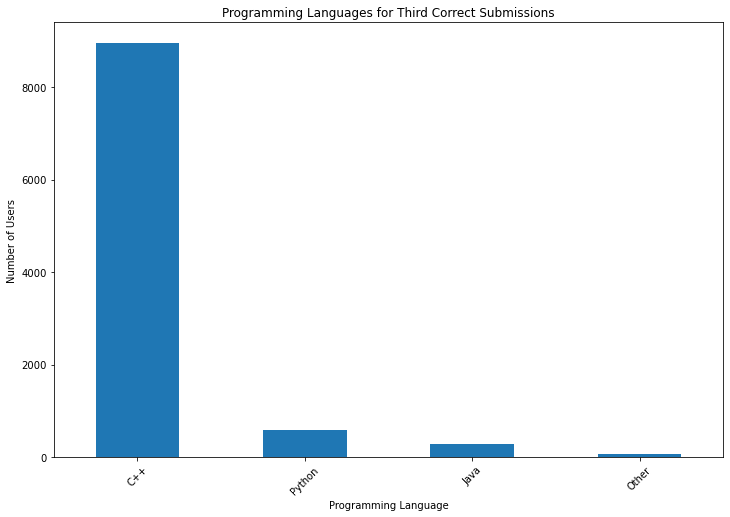

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Load the data from the uploaded file
# file_path = '/mnt/data/filtered_submissions_by_relative_time.csv'
# cf_data = pd.read_csv(file_path)

# Filtering and sorting submissions with a verdict of 'OK'
ok_submissions_sorted = cf_data[cf_data['verdict'] == 'OK'].sort_values(by=['author_handle', 'creation_time_seconds'])

# Extracting the second and third correct submissions for each user
second_and_third_submissions = ok_submissions_sorted.groupby('author_handle').nth([1, 2])

# Calculate the time differences specifically between the second and third correct solutions
second_and_third_submissions['time_to_solve_third'] = second_and_third_submissions.groupby('author_handle')['relative_time_seconds'].diff()

# Isolate only the third submission for plotting and analysis
third_submissions = second_and_third_submissions.loc[second_and_third_submissions.index.get_level_values('author_handle').duplicated(keep='first')].reset_index()

# Apply the collapse_language function to collapse programming languages
def collapse_language(lang):
    if 'C++' in lang:
        return 'C++'
    elif 'Python' in lang or 'PyPy' in lang:
        return 'Python'
    elif 'Java' in lang:
        return 'Java'
    else:
        return 'Other'
third_submissions['collapsed_language'] = third_submissions['programming_language'].apply(collapse_language)

# Plotting distribution of Problem Types for the Third Correct Submission
plt.figure(figsize=(10, 6))
third_submissions['problem_index'].value_counts().plot(kind='bar')
plt.title('Distribution of Problem Types for Third Correct Submissions')
plt.xlabel('Problem Index')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

# Histogram of Time Taken to Solve the Third Problem
plt.figure(figsize=(10, 6))
third_submissions['time_to_solve_third'].dropna().hist(bins=30)
plt.title('Time Taken to Solve Third Problem')
plt.xlabel('Time in Seconds')
plt.ylabel('Number of Users')
plt.show()

# Distribution of Collapsed Programming Languages for the Third Correct Submissions
plt.figure(figsize=(12, 8))
third_submissions['collapsed_language'].value_counts().plot(kind='bar')
plt.title('Programming Languages for Third Correct Submissions')
plt.xlabel('Programming Language')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


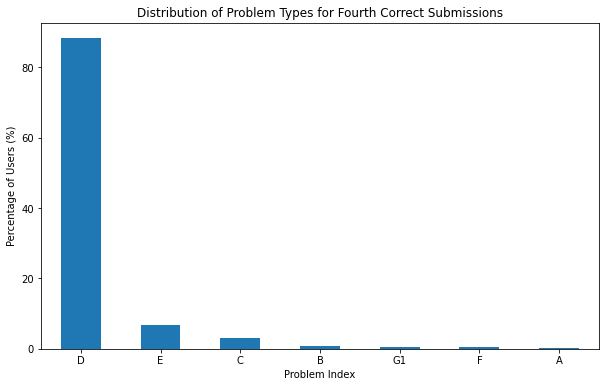

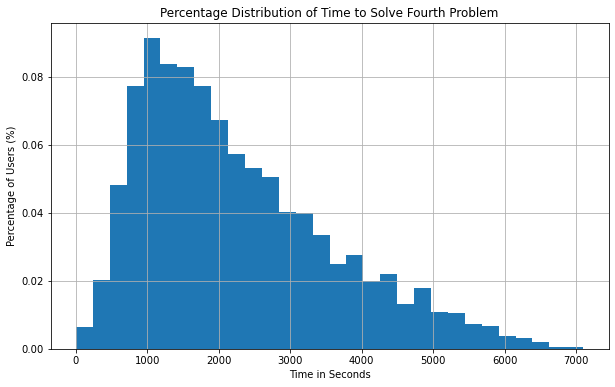

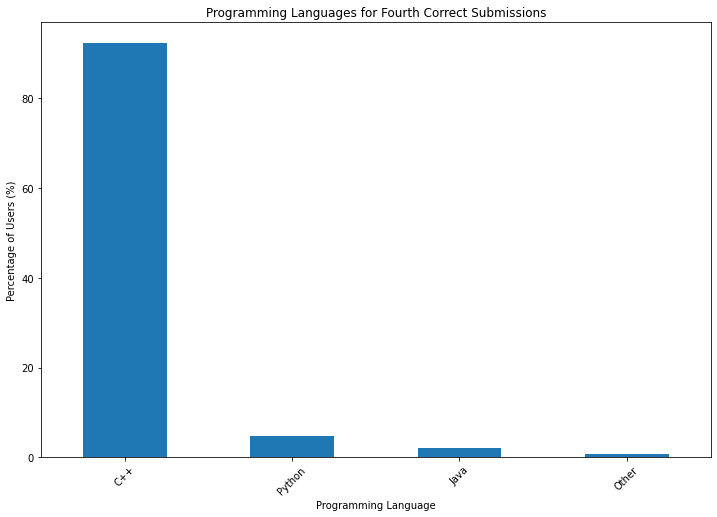

C++       92.326581
Python     4.849601
Java       2.169020
Other      0.654798
Name: collapsed_language, dtype: float64

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Load the data from the uploaded file
# file_path = '/mnt/data/filtered_submissions_by_relative_time.csv'
# cf_data = pd.read_csv(file_path)

# Filtering and sorting submissions with a verdict of 'OK'
ok_submissions_sorted = cf_data[cf_data['verdict'] == 'OK'].sort_values(by=['author_handle', 'creation_time_seconds'])

# Extracting the second and third correct submissions for each user
second_and_third_submissions = ok_submissions_sorted.groupby('author_handle').nth([2, 3])

# Calculate the time differences specifically between the second and third correct solutions
second_and_third_submissions['time_to_solve_third'] = second_and_third_submissions.groupby('author_handle')['relative_time_seconds'].diff()

# Isolate only the third submission for plotting and analysis
third_submissions = second_and_third_submissions.loc[second_and_third_submissions.index.get_level_values('author_handle').duplicated(keep='first')].reset_index()

# Apply the collapse_language function to collapse programming languages
def collapse_language(lang):
    if 'C++' in lang:
        return 'C++'
    elif 'Python' in lang or 'PyPy' in lang:
        return 'Python'
    elif 'Java' in lang:
        return 'Java'
    else:
        return 'Other'
third_submissions['collapsed_language'] = third_submissions['programming_language'].apply(collapse_language)

# Plotting distribution of Problem Types for the Fourth Correct Submission
plt.figure(figsize=(10, 6))
(third_submissions['problem_index'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Distribution of Problem Types for Fourth Correct Submissions')
plt.xlabel('Problem Index')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=0)
plt.show()

# Histogram of Time Taken to Solve the Fourth Problem
plt.figure(figsize=(10, 6))
weights = np.ones_like(third_submissions['time_to_solve_third'].dropna()) / len(third_submissions['time_to_solve_third'].dropna())
third_submissions['time_to_solve_third'].dropna().hist(weights=weights, bins=30)
plt.title('Percentage Distribution of Time to Solve Fourth Problem')
plt.xlabel('Time in Seconds')
plt.ylabel('Percentage of Users (%)')
plt.show()

# Distribution of Collapsed Programming Languages for the Fourth Correct Submissions
plt.figure(figsize=(12, 8))
(third_submissions['collapsed_language'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Programming Languages for Fourth Correct Submissions')
plt.xlabel('Programming Language')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=45)
plt.show()
third_submissions['collapsed_language'].value_counts(normalize=True) * 100

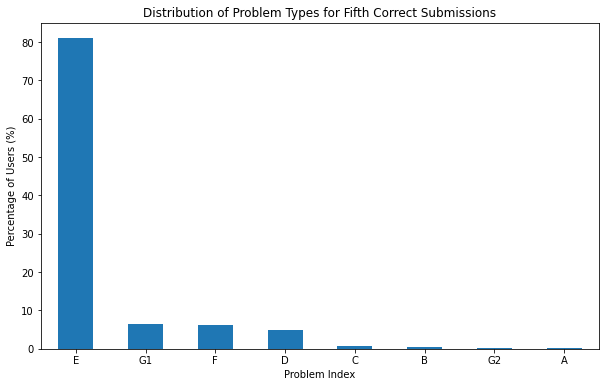

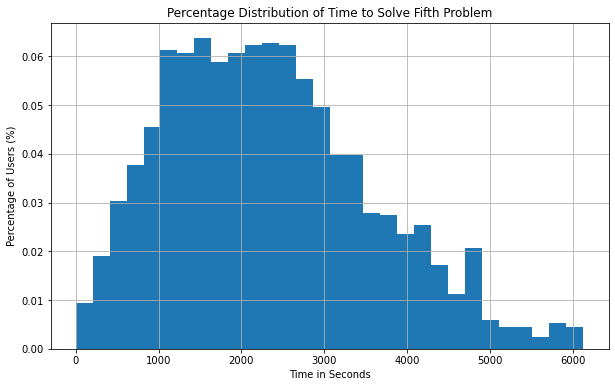

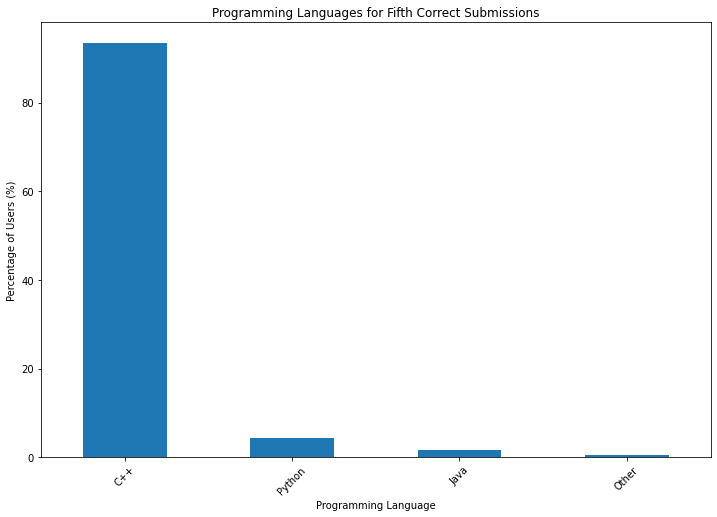

C++       93.379107
Python     4.364885
Java       1.716528
Other      0.539480
Name: collapsed_language, dtype: float64

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Load the data from the uploaded file
# file_path = '/mnt/data/filtered_submissions_by_relative_time.csv'
# cf_data = pd.read_csv(file_path)

# Filtering and sorting submissions with a verdict of 'OK'
ok_submissions_sorted = cf_data[cf_data['verdict'] == 'OK'].sort_values(by=['author_handle', 'creation_time_seconds'])

# Extracting the second and third correct submissions for each user
second_and_third_submissions = ok_submissions_sorted.groupby('author_handle').nth([3, 4])

# Calculate the time differences specifically between the second and third correct solutions
second_and_third_submissions['time_to_solve_third'] = second_and_third_submissions.groupby('author_handle')['relative_time_seconds'].diff()

# Isolate only the third submission for plotting and analysis
third_submissions = second_and_third_submissions.loc[second_and_third_submissions.index.get_level_values('author_handle').duplicated(keep='first')].reset_index()

# Apply the collapse_language function to collapse programming languages
def collapse_language(lang):
    if 'C++' in lang:
        return 'C++'
    elif 'Python' in lang or 'PyPy' in lang:
        return 'Python'
    elif 'Java' in lang:
        return 'Java'
    else:
        return 'Other'
third_submissions['collapsed_language'] = third_submissions['programming_language'].apply(collapse_language)

# Plotting distribution of Problem Types for the Fifth Correct Submission
plt.figure(figsize=(10, 6))
(third_submissions['problem_index'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Distribution of Problem Types for Fifth Correct Submissions')
plt.xlabel('Problem Index')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=0)
plt.show()

# Histogram of Time Taken to Solve the Fifth Problem
plt.figure(figsize=(10, 6))
weights = np.ones_like(third_submissions['time_to_solve_third'].dropna()) / len(third_submissions['time_to_solve_third'].dropna())
third_submissions['time_to_solve_third'].dropna().hist(weights=weights, bins=30)
plt.title('Percentage Distribution of Time to Solve Fifth Problem')
plt.xlabel('Time in Seconds')
plt.ylabel('Percentage of Users (%)')
plt.show()

# Distribution of Collapsed Programming Languages for the Fifth Correct Submissions
plt.figure(figsize=(12, 8))
(third_submissions['collapsed_language'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Programming Languages for Fifth Correct Submissions')
plt.xlabel('Programming Language')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=45)
plt.show()
third_submissions['collapsed_language'].value_counts(normalize=True) * 100

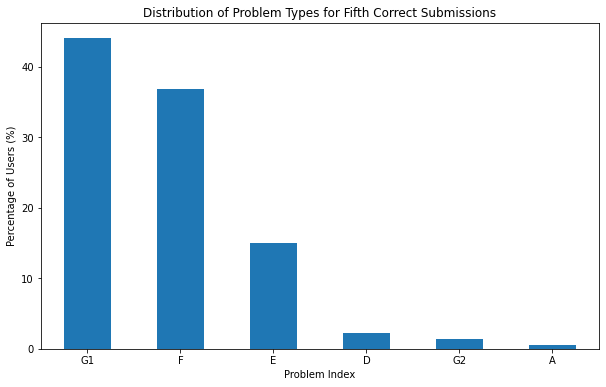

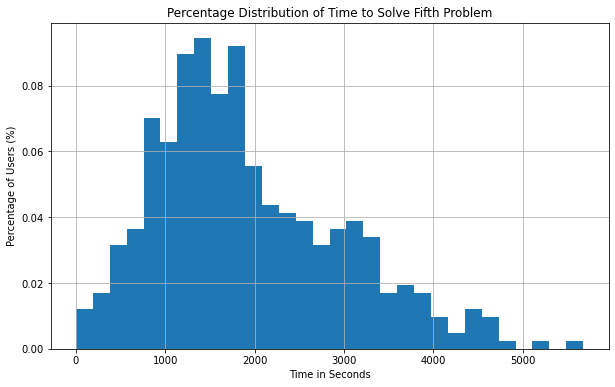

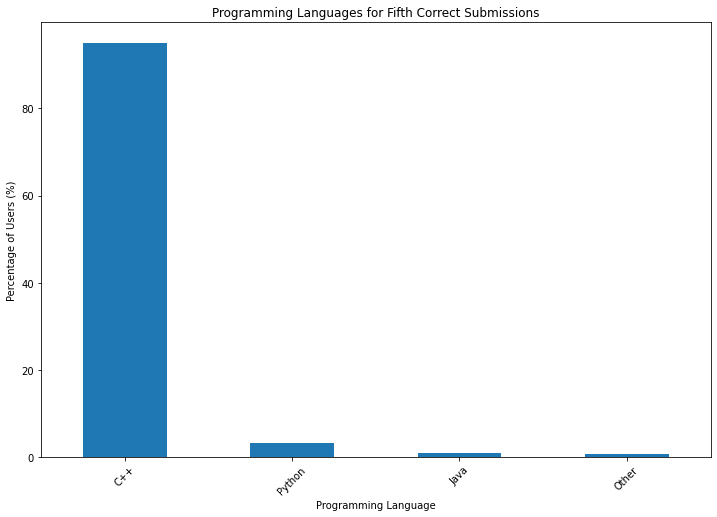

C++       94.915254
Python     3.389831
Java       0.968523
Other      0.726392
Name: collapsed_language, dtype: float64

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Load the data from the uploaded file
# file_path = '/mnt/data/filtered_submissions_by_relative_time.csv'
# cf_data = pd.read_csv(file_path)

# Filtering and sorting submissions with a verdict of 'OK'
ok_submissions_sorted = cf_data[cf_data['verdict'] == 'OK'].sort_values(by=['author_handle', 'creation_time_seconds'])

# Extracting the second and third correct submissions for each user
second_and_third_submissions = ok_submissions_sorted.groupby('author_handle').nth([4, 5])

# Calculate the time differences specifically between the second and third correct solutions
second_and_third_submissions['time_to_solve_third'] = second_and_third_submissions.groupby('author_handle')['relative_time_seconds'].diff()

# Isolate only the third submission for plotting and analysis
third_submissions = second_and_third_submissions.loc[second_and_third_submissions.index.get_level_values('author_handle').duplicated(keep='first')].reset_index()

# Apply the collapse_language function to collapse programming languages
def collapse_language(lang):
    if 'C++' in lang:
        return 'C++'
    elif 'Python' in lang or 'PyPy' in lang:
        return 'Python'
    elif 'Java' in lang:
        return 'Java'
    else:
        return 'Other'
third_submissions['collapsed_language'] = third_submissions['programming_language'].apply(collapse_language)

# Plotting distribution of Problem Types for the Fifth Correct Submission
plt.figure(figsize=(10, 6))
(third_submissions['problem_index'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Distribution of Problem Types for Fifth Correct Submissions')
plt.xlabel('Problem Index')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=0)
plt.show()

# Histogram of Time Taken to Solve the Fifth Problem
plt.figure(figsize=(10, 6))
weights = np.ones_like(third_submissions['time_to_solve_third'].dropna()) / len(third_submissions['time_to_solve_third'].dropna())
third_submissions['time_to_solve_third'].dropna().hist(weights=weights, bins=30)
plt.title('Percentage Distribution of Time to Solve Fifth Problem')
plt.xlabel('Time in Seconds')
plt.ylabel('Percentage of Users (%)')
plt.show()

# Distribution of Collapsed Programming Languages for the Fifth Correct Submissions
plt.figure(figsize=(12, 8))
(third_submissions['collapsed_language'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Programming Languages for Fifth Correct Submissions')
plt.xlabel('Programming Language')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=45)
plt.show()
third_submissions['collapsed_language'].value_counts(normalize=True) * 100

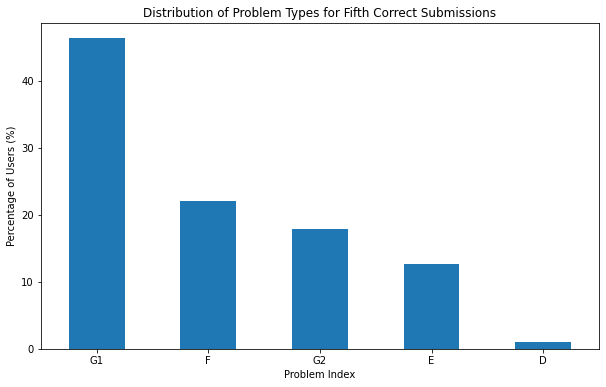

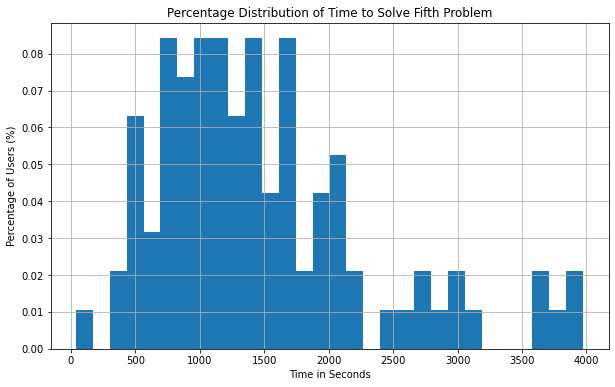

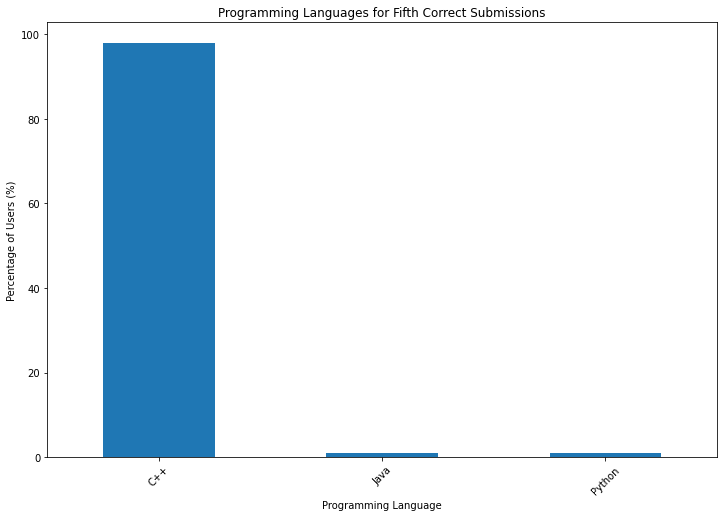

C++       97.894737
Java       1.052632
Python     1.052632
Name: collapsed_language, dtype: float64

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Load the data from the uploaded file
# file_path = '/mnt/data/filtered_submissions_by_relative_time.csv'
# cf_data = pd.read_csv(file_path)

# Filtering and sorting submissions with a verdict of 'OK'
ok_submissions_sorted = cf_data[cf_data['verdict'] == 'OK'].sort_values(by=['author_handle', 'creation_time_seconds'])

# Extracting the second and third correct submissions for each user
second_and_third_submissions = ok_submissions_sorted.groupby('author_handle').nth([5, 6])

# Calculate the time differences specifically between the second and third correct solutions
second_and_third_submissions['time_to_solve_third'] = second_and_third_submissions.groupby('author_handle')['relative_time_seconds'].diff()

# Isolate only the third submission for plotting and analysis
third_submissions = second_and_third_submissions.loc[second_and_third_submissions.index.get_level_values('author_handle').duplicated(keep='first')].reset_index()

# Apply the collapse_language function to collapse programming languages
def collapse_language(lang):
    if 'C++' in lang:
        return 'C++'
    elif 'Python' in lang or 'PyPy' in lang:
        return 'Python'
    elif 'Java' in lang:
        return 'Java'
    else:
        return 'Other'
third_submissions['collapsed_language'] = third_submissions['programming_language'].apply(collapse_language)

# Plotting distribution of Problem Types for the Fifth Correct Submission
plt.figure(figsize=(10, 6))
(third_submissions['problem_index'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Distribution of Problem Types for Fifth Correct Submissions')
plt.xlabel('Problem Index')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=0)
plt.show()

# Histogram of Time Taken to Solve the Fifth Problem
plt.figure(figsize=(10, 6))
weights = np.ones_like(third_submissions['time_to_solve_third'].dropna()) / len(third_submissions['time_to_solve_third'].dropna())
third_submissions['time_to_solve_third'].dropna().hist(weights=weights, bins=30)
plt.title('Percentage Distribution of Time to Solve Fifth Problem')
plt.xlabel('Time in Seconds')
plt.ylabel('Percentage of Users (%)')
plt.show()

# Distribution of Collapsed Programming Languages for the Fifth Correct Submissions
plt.figure(figsize=(12, 8))
(third_submissions['collapsed_language'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Programming Languages for Fifth Correct Submissions')
plt.xlabel('Programming Language')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=45)
plt.show()
third_submissions['collapsed_language'].value_counts(normalize=True) * 100

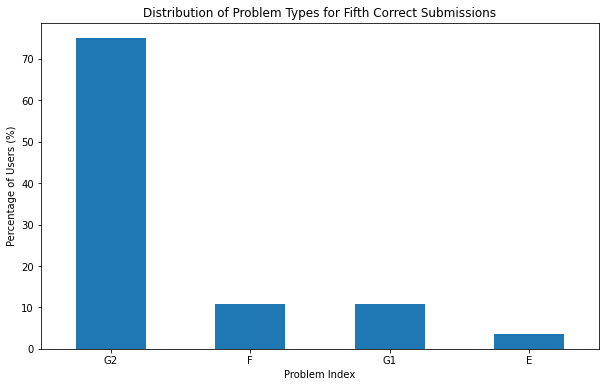

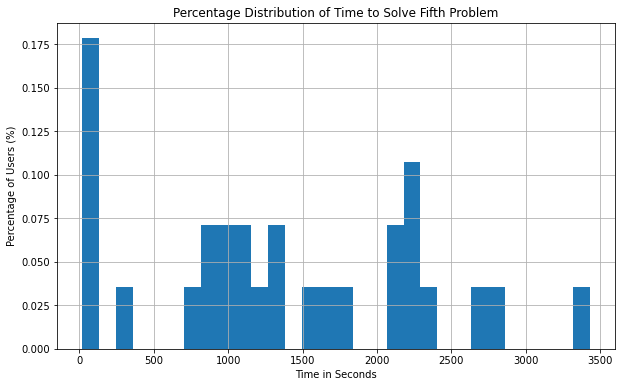

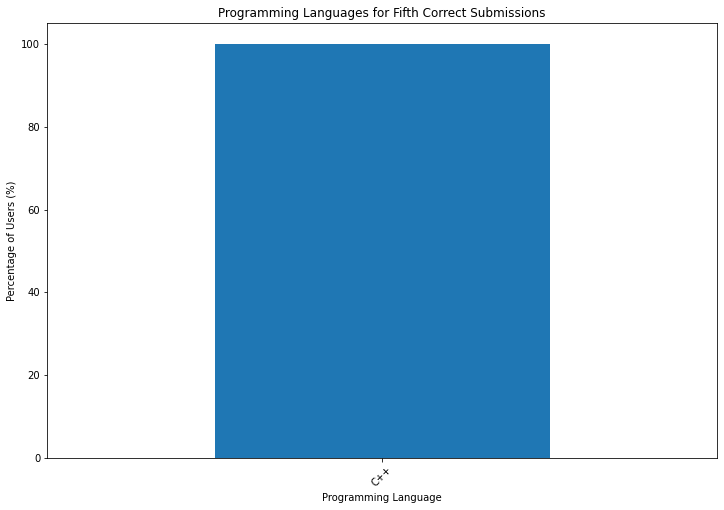

C++    100.0
Name: collapsed_language, dtype: float64

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Load the data from the uploaded file
# file_path = '/mnt/data/filtered_submissions_by_relative_time.csv'
# cf_data = pd.read_csv(file_path)

# Filtering and sorting submissions with a verdict of 'OK'
ok_submissions_sorted = cf_data[cf_data['verdict'] == 'OK'].sort_values(by=['author_handle', 'creation_time_seconds'])

# Extracting the second and third correct submissions for each user
second_and_third_submissions = ok_submissions_sorted.groupby('author_handle').nth([6, 7])

# Calculate the time differences specifically between the second and third correct solutions
second_and_third_submissions['time_to_solve_third'] = second_and_third_submissions.groupby('author_handle')['relative_time_seconds'].diff()

# Isolate only the third submission for plotting and analysis
third_submissions = second_and_third_submissions.loc[second_and_third_submissions.index.get_level_values('author_handle').duplicated(keep='first')].reset_index()

# Apply the collapse_language function to collapse programming languages
def collapse_language(lang):
    if 'C++' in lang:
        return 'C++'
    elif 'Python' in lang or 'PyPy' in lang:
        return 'Python'
    elif 'Java' in lang:
        return 'Java'
    else:
        return 'Other'
third_submissions['collapsed_language'] = third_submissions['programming_language'].apply(collapse_language)

# Plotting distribution of Problem Types for the Fifth Correct Submission
plt.figure(figsize=(10, 6))
(third_submissions['problem_index'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Distribution of Problem Types for Fifth Correct Submissions')
plt.xlabel('Problem Index')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=0)
plt.show()

# Histogram of Time Taken to Solve the Fifth Problem
plt.figure(figsize=(10, 6))
weights = np.ones_like(third_submissions['time_to_solve_third'].dropna()) / len(third_submissions['time_to_solve_third'].dropna())
third_submissions['time_to_solve_third'].dropna().hist(weights=weights, bins=30)
plt.title('Percentage Distribution of Time to Solve Fifth Problem')
plt.xlabel('Time in Seconds')
plt.ylabel('Percentage of Users (%)')
plt.show()

# Distribution of Collapsed Programming Languages for the Fifth Correct Submissions
plt.figure(figsize=(12, 8))
(third_submissions['collapsed_language'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Programming Languages for Fifth Correct Submissions')
plt.xlabel('Programming Language')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=45)
plt.show()
third_submissions['collapsed_language'].value_counts(normalize=True) * 100